# Image Classification
Image classification is one of the important use cases in our daily life. Automobile, e-commerce, retail, manufacturing, industries, security, survelliance, healthcare, farming tect, can have a wide application of image classification.

## Objective:
In this notebook, we will build a neural network to classify the image based on the object present on the image.


# Advanced techniques for training neural networks.
Weight Initialization
Nonlinearily
OPtimizers
Batch Normalization
Dropout

# About Dataset
## Label
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [3]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [4]:
n=5

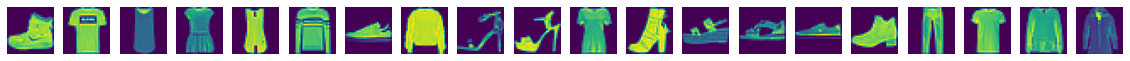

label for each of the above images %s  [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [7]:
# Visualizing the first 10 images in the dataset and their lables
plt.figure(figsize=(20,1))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()
print('label for each of the above images %s ',(y_train[0:20]))

In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

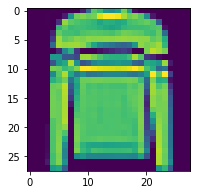

Label:  2


In [9]:
plt.figure(figsize=[3,3])
plt.imshow(X_train[n])
plt.show()
print('Label: ',y_train[n])

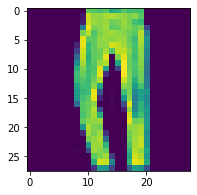

Label:  1


In [10]:
plt.figure(figsize=[3,3])
plt.imshow(X_test[n])
plt.show()
print('Label: ',y_test[n])

# Data Pre-processing

In [14]:
# Reshaping X data: (n,28,28) => (n,784)
X_train = X_train.reshape((X_train.shape[0],-1)) # reduce 1 dimesion -> nn cant recog 3 dimension
X_test = X_test.reshape((X_test.shape[0],-1))

In [15]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [16]:
# Converting y data into categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train.shape , y_test.shape

((60000, 10), (10000, 10))

# Basic NN model
Naive MLP model without any alterations

In [19]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers


In [30]:
model = Sequential()

In [31]:
model.add(Dense(50,input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [32]:
sgd = optimizers.SGD(lr = 0.01) # learing rate = 0.001
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,batch_size=200,epochs=30,verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 2.3186 - accuracy: 0.1098
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 2.2983 - accuracy: 0.1475
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2965 - accuracy: 0.1500
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2945 - accuracy: 0.2005
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 2.2925 - accuracy: 0.2013
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2904 - accuracy: 0.2423
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2880 - accuracy: 0.2824
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2853 - accuracy: 0.2963
Epoch 9/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2823 - accuracy: 0.2835
Epoch 10/30
300/300 [==============================] - 1s 3ms/step - loss: 2.2788 - accuracy: 0.3200

In [34]:
result = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6505 - accuracy: 0.3872


In [35]:
print('Test accuracy: ',result[1])

Test accuracy:  0.3871999979019165


# 1. Weight Initialization
Changing weight initializtion schema can significantly imporove traning of the model by preventing vanishing gradient problem up to some degree

In [36]:
# from now in, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50,input_shape=(784,),kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(50,kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(10,kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer=sgd, loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [37]:
model = mlp_model()
history = model.fit(X_train,y_train,batch_size=200,epochs=30,verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 2.3859 - accuracy: 0.0657
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 2.3391 - accuracy: 0.0601
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 2.3171 - accuracy: 0.0699
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 2.3066 - accuracy: 0.0762
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 2.3015 - accuracy: 0.0783
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2986 - accuracy: 0.0961
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 2.2967 - accuracy: 0.1222
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 2.2952 - accuracy: 0.1461
Epoch 9/30
300/300 [==============================] - 1s 3ms/step - loss: 2.2939 - accuracy: 0.1698
Epoch 10/30
300/300 [==============================] - 1s 3ms/step - loss: 2.2928 - accuracy: 0.1852

In [38]:
result = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2750 - accuracy: 0.4394


In [39]:
print('Test accuracy: ',result[1])

Test accuracy:  0.43939998745918274


# 2.Nonlinearity (Activation function)

- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tahn, try many of them,'relu' ( rectified linear unit) is one of the most popular ones

In [40]:
# from now in, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50,input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(50,))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer=sgd, loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [41]:
model = mlp_model()
history = model.fit(X_train,y_train,batch_size=200,epochs=30,verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 1.7076 - accuracy: 0.6108
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.7795 - accuracy: 0.7204
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.6847 - accuracy: 0.7515
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.6338 - accuracy: 0.7715
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5969 - accuracy: 0.7857
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5726 - accuracy: 0.7936
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5506 - accuracy: 0.8015
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5331 - accuracy: 0.8075
Epoch 9/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5201 - accuracy: 0.8114
Epoch 10/30
300/300 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.8169

In [42]:
result = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4926 - accuracy: 0.8265


In [43]:
print('Test accuracy: ',result[1])

Test accuracy:  0.8264999985694885


# 3.Batch Normalization

- Batch Normalization , one of the methods to prevent the 'internal covatiance shift' problem, has proven to be hightly effective
- Normalize each mini-batch before nonlinearity

In [44]:
from keras.layers import BatchNormalization, Dropout
# Batch Normaliztion layer is usually inserted after dense/convolution and before nonlinearity

In [45]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50,input_shape=(784,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer=sgd, loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [46]:
model = mlp_model()
history = model.fit(X_train,y_train,batch_size=200,epochs=30,verbose=1)

Epoch 1/30
300/300 [==============================] - 2s 5ms/step - loss: 1.8984 - accuracy: 0.3609
Epoch 2/30
300/300 [==============================] - 2s 5ms/step - loss: 1.3618 - accuracy: 0.5854
Epoch 3/30
300/300 [==============================] - 2s 5ms/step - loss: 1.1586 - accuracy: 0.6579
Epoch 4/30
300/300 [==============================] - 2s 5ms/step - loss: 1.0404 - accuracy: 0.6923
Epoch 5/30
300/300 [==============================] - 2s 5ms/step - loss: 0.9576 - accuracy: 0.7133
Epoch 6/30
300/300 [==============================] - 2s 5ms/step - loss: 0.8951 - accuracy: 0.7309
Epoch 7/30
300/300 [==============================] - 2s 5ms/step - loss: 0.8457 - accuracy: 0.7408
Epoch 8/30
300/300 [==============================] - 2s 5ms/step - loss: 0.8057 - accuracy: 0.7497
Epoch 9/30
300/300 [==============================] - 2s 5ms/step - loss: 0.7703 - accuracy: 0.7591
Epoch 10/30
300/300 [==============================] - 2s 5ms/step - loss: 0.7417 - accuracy: 0.7653

In [47]:
result = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5270 - accuracy: 0.8185


In [48]:
print('Test accuracy: ',result[1])

Test accuracy:  0.8184999823570251


# 4 Dropout :
* some number of layer outputs are randomly ignored or "dropped out".
* It may decrease accuracy level.
* Better not to use dropout..

In [49]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50,input_shape=(784,),kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50,))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.001)
    model.compile(optimizer=sgd, loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [50]:
model = mlp_model()
history = model.fit(X_train,y_train,batch_size=200,epochs=30,verbose=1)

Epoch 1/30
300/300 [==============================] - 2s 6ms/step - loss: 2.4789 - accuracy: 0.1558
Epoch 2/30
300/300 [==============================] - 2s 6ms/step - loss: 2.0178 - accuracy: 0.2821
Epoch 3/30
300/300 [==============================] - 2s 6ms/step - loss: 1.7610 - accuracy: 0.3956
Epoch 4/30
300/300 [==============================] - 2s 6ms/step - loss: 1.5952 - accuracy: 0.4747
Epoch 5/30
300/300 [==============================] - 2s 6ms/step - loss: 1.4729 - accuracy: 0.5263
Epoch 6/30
300/300 [==============================] - 2s 6ms/step - loss: 1.3768 - accuracy: 0.5662
Epoch 7/30
300/300 [==============================] - 2s 6ms/step - loss: 1.2971 - accuracy: 0.5960
Epoch 8/30
300/300 [==============================] - 2s 6ms/step - loss: 1.2386 - accuracy: 0.6133
Epoch 9/30
300/300 [==============================] - 2s 6ms/step - loss: 1.1874 - accuracy: 0.6308
Epoch 10/30
300/300 [==============================] - 2s 6ms/step - loss: 1.1413 - accuracy: 0.6437

In [53]:
result = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6084 - accuracy: 0.7928


In [54]:
print('Test accuracy: ',result[1])

Test accuracy:  0.7928000092506409
